In [3]:
import pandas as pd
import re
import nltk
import itertools

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

pd.set_option('display.max_colwidth', None)

In [4]:
data_path = 'twitter_data/twitter_sentiment_data.csv'
data_df = pd.read_csv(data_path)

In [5]:
data_df.head(5)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153


In [6]:
import numpy as np
data_df['sentiment'] = np.where((data_df.sentiment >= 0), 0, 1)
data_df.head()

,sentiment,message,tweetid
0,1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840
1,0,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641
2,0,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256
3,0,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904
4,0,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153


In [7]:
data_df.shape

(43943, 3)

In [8]:
data_df['sentiment'].value_counts(normalize=True)

0    0.909201
1    0.090799
Name: sentiment, dtype: float64

In [9]:
from copy import deepcopy
eda = deepcopy(data_df)

In [10]:
sentiment_num2name = {
    1: "Anti",
    0: "Not Anti",
}
eda["sentiment"] = eda["sentiment"].apply(lambda num: sentiment_num2name[num])
eda.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840
1,Not Anti,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641
2,Not Anti,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256
3,Not Anti,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904
4,Not Anti,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153


In [11]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

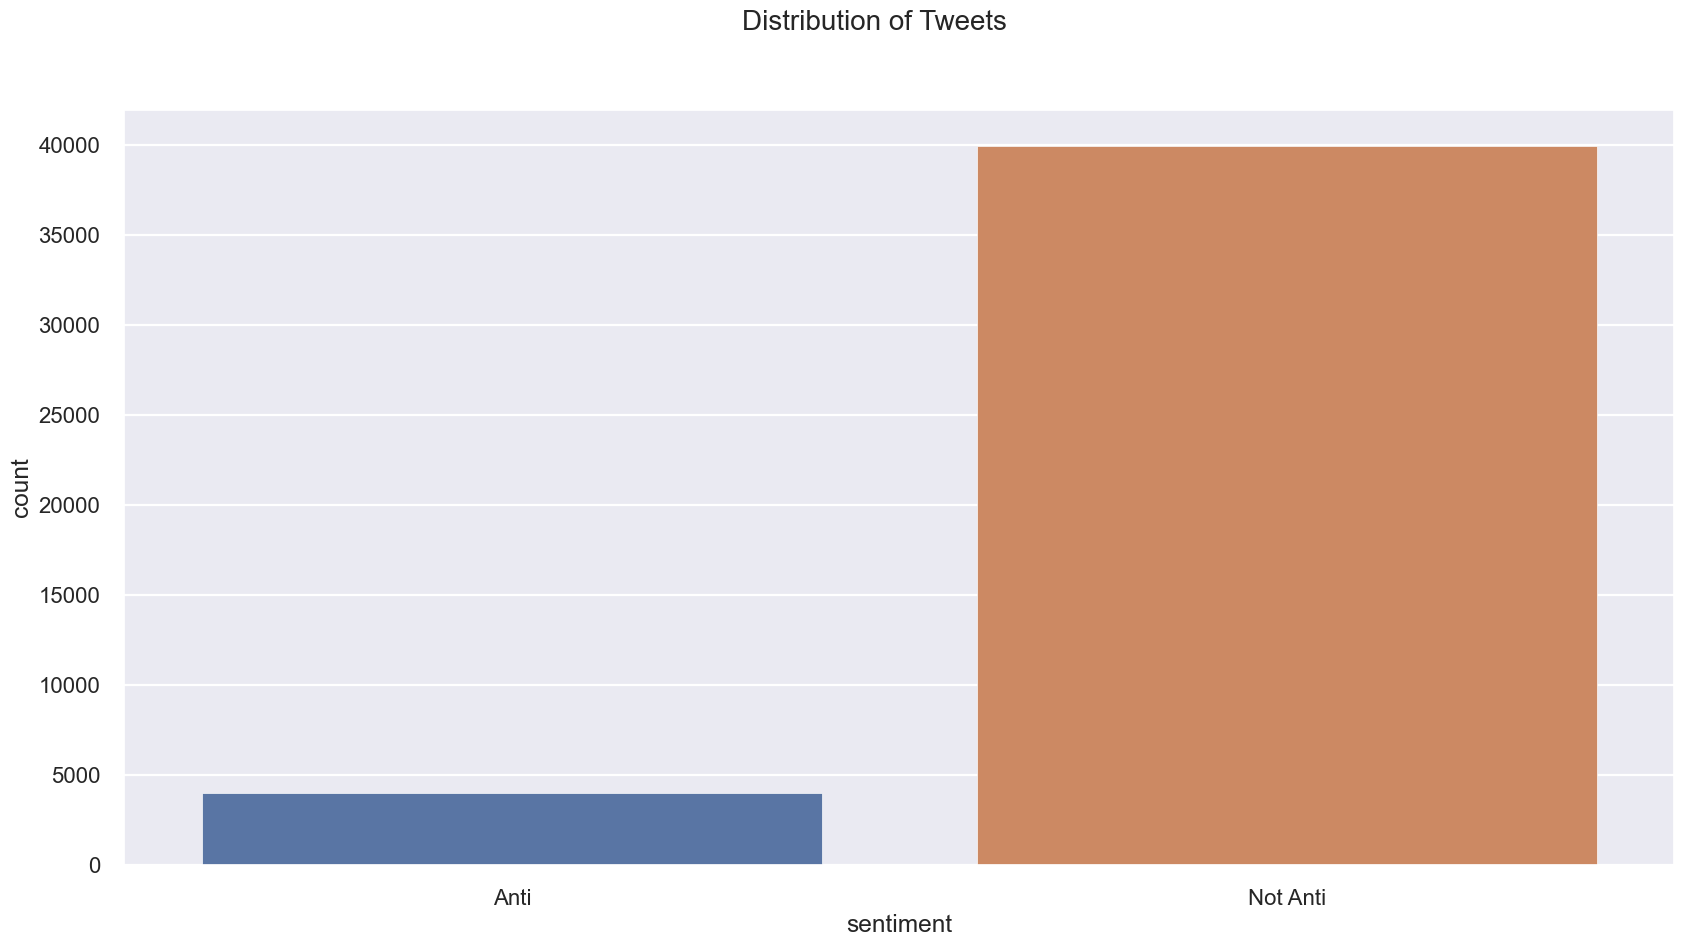

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10), dpi=100)

sns.countplot(eda["sentiment"], ax=axes)
# labels = list(sentiment_num2name.values())
# axes[1].pie(eda["sentiment"].value_counts(),
#             labels=labels,
#             autopct="%1.0f%%",
#             startangle=90,
#             explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=20)
plt.show()

In [13]:
import re
import nltk
import itertools

In [14]:
from tqdm import tqdm
top15 = {}

by_sentiment = eda.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))


100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


Anti               Not Anti       
        hashtags counts        hashtags counts
0           tcot     59         climate    930
1           maga     31   climatechange    606
2        climate     25  beforetheflood    279
3  climatechange     25    actonclimate    158
4          pjnet     23           trump    136
5          trump     21     environment    134
6  globalwarming     19  parisagreement    130
7       fakenews     15           cop22    123
8             p2     13   globalwarming    120
9       teaparty     11           cop21    108

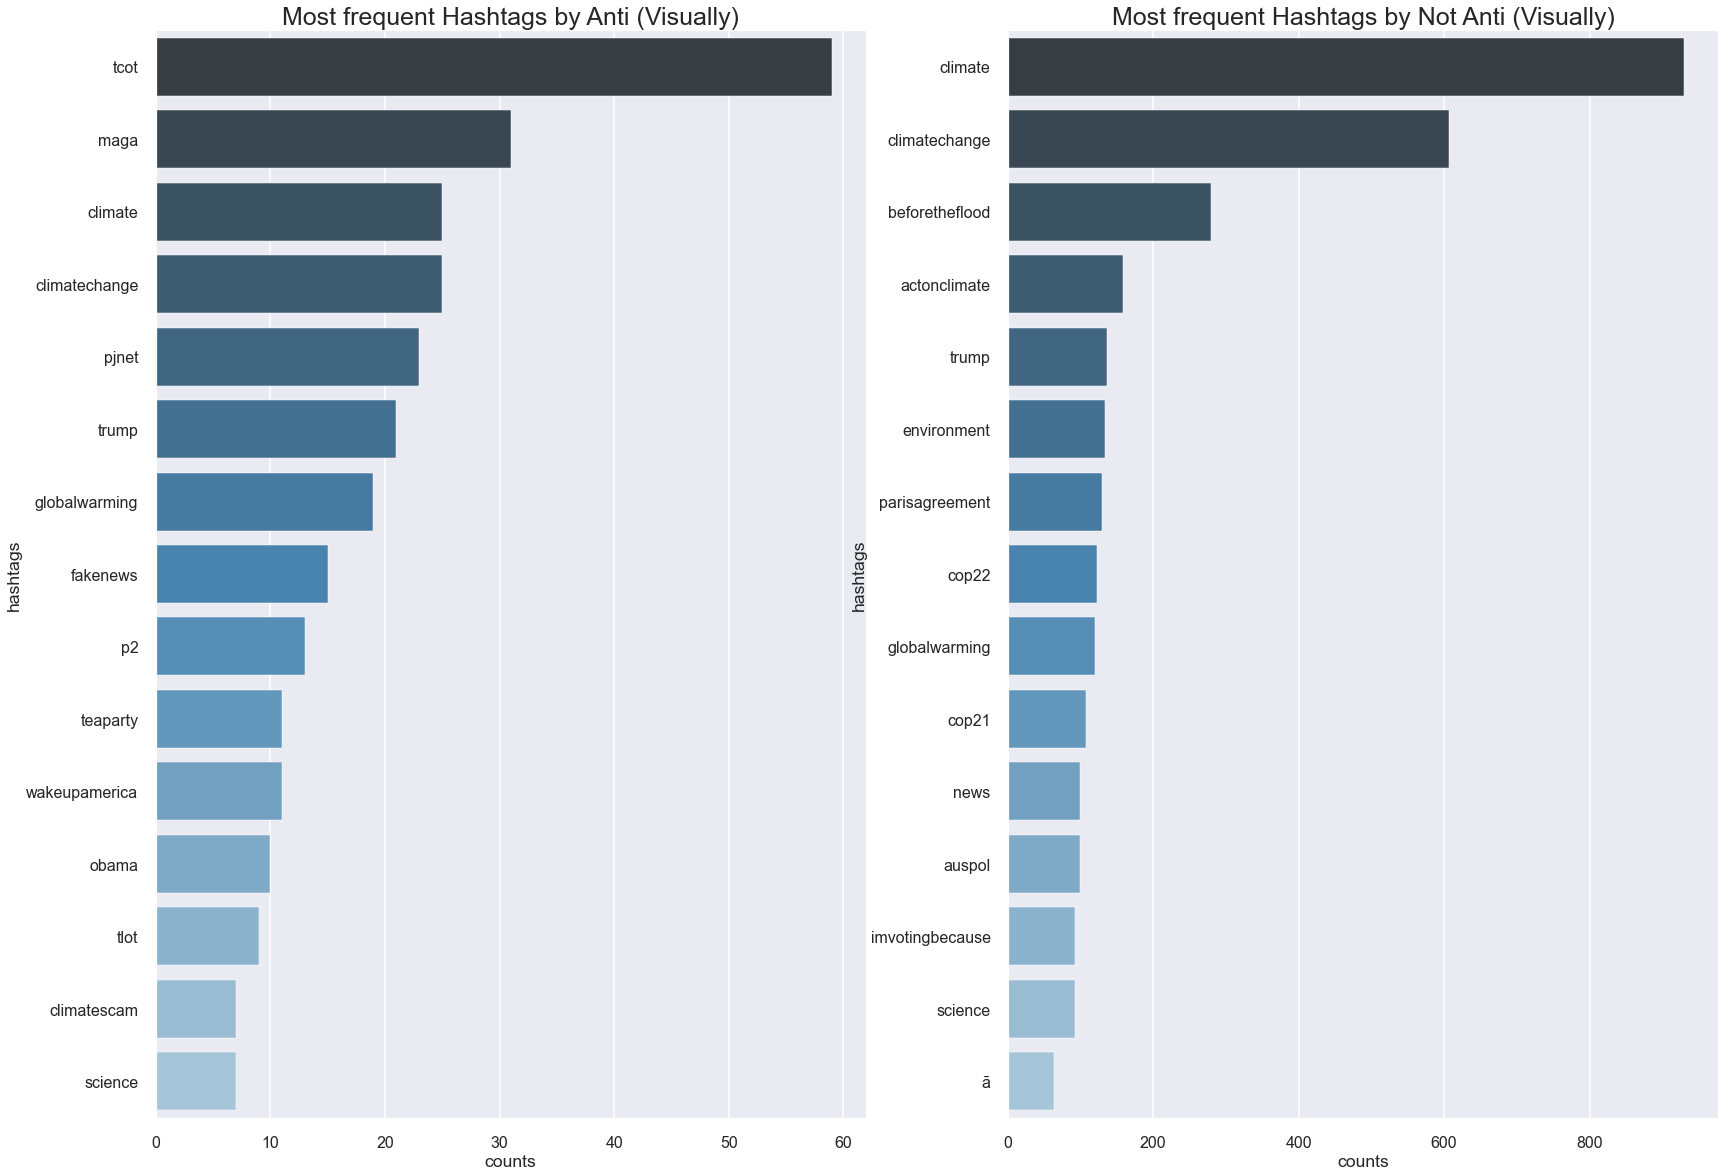

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[ counter % 2])
    axes[counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

In [16]:
def cleaner(tweet):
    
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"^RT[\s]+",
        r"https?:\/\/.*[\r\n]*",  # strip URLs
        #r"#\w*",  # strip hashtags
        r"&amp"
        r"[,.;':@#?!\&/$]+\ *",
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
        r"[^A-Za-z0-9]+"
    ]
    for key in to_del:
        tweet = re.sub(key, " ", tweet)
    
    tweet = tweet.lower()
    # strip punctuation and special characters
    #tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")


In [17]:
tweet = "RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im"
cleaned_tweet = cleaner(tweet)
cleaned_tweet

'pranita biswasi a lutheran from odisha gives testimony on effects of climate change natural disasters on the po '

In [18]:
eda["message"] = eda["message"].apply(cleaner)
eda.head()

,sentiment,message,tweetid
0,Anti,climate change is an interesting hustle as it was global warming but the planet stopped warming for yes while the suv boom,792927353886371840
1,Not Anti,watch beforetheflood right here as travels the world to tackle climate change,793124211518832641
2,Not Anti,fabulous leonardo dicaprio s film on climate change is brilliant do watch,793124402388832256
3,Not Anti,just watched this amazing documentary by leonardodicaprio on climate change we all think this,793124635873275904
4,Not Anti,pranita biswasi a lutheran from odisha gives testimony on effects of climate change natural disasters on the po,793125156185137153


In [19]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df



[nltk_data] Downloading package punkt to /Users/Ish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Ish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Ish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
eda = lemmatizer(eda)
eda.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Anti,climate change is an interesting hustle as it was global warming but the planet stopped warming for yes while the suv boom,792927353886371840,122,"[climate, change, is, an, interesting, hustle, as, it, was, global, warming, but, the, planet, stopped, warming, for, yes, while, the, suv, boom]","[(climate, n), (change, n), (is, v), (an, n), (interesting, a), (hustle, n), (as, n), (it, n), (was, v), (global, a), (warming, n), (but, n), (the, n), (planet, n), (stopped, v), (warming, v), (for, n), (yes, n), (while, n), (the, n), (suv, n), (boom, n)]",climate change be an interesting hustle a it be global warming but the planet stop warm for yes while the suv boom
1,Not Anti,watch beforetheflood right here as travels the world to tackle climate change,793124211518832641,78,"[watch, beforetheflood, right, here, as, travels, the, world, to, tackle, climate, change]","[(watch, n), (beforetheflood, n), (right, r), (here, r), (as, n), (travels, n), (the, n), (world, n), (to, n), (tackle, v), (climate, n), (change, n)]",watch beforetheflood right here a travel the world to tackle climate change
2,Not Anti,fabulous leonardo dicaprio s film on climate change is brilliant do watch,793124402388832256,74,"[fabulous, leonardo, dicaprio, s, film, on, climate, change, is, brilliant, do, watch]","[(fabulous, a), (leonardo, n), (dicaprio, n), (s, n), (film, n), (on, n), (climate, n), (change, n), (is, v), (brilliant, a), (do, v), (watch, v)]",fabulous leonardo dicaprio s film on climate change be brilliant do watch
3,Not Anti,just watched this amazing documentary by leonardodicaprio on climate change we all think this,793124635873275904,94,"[just, watched, this, amazing, documentary, by, leonardodicaprio, on, climate, change, we, all, think, this]","[(just, r), (watched, v), (this, n), (amazing, a), (documentary, n), (by, n), (leonardodicaprio, n), (on, n), (climate, n), (change, n), (we, n), (all, n), (think, v), (this, n)]",just watch this amazing documentary by leonardodicaprio on climate change we all think this
4,Not Anti,pranita biswasi a lutheran from odisha gives testimony on effects of climate change natural disasters on the po,793125156185137153,112,"[pranita, biswasi, a, lutheran, from, odisha, gives, testimony, on, effects, of, climate, change, natural, disasters, on, the, po]","[(pranita, a), (biswasi, n), (a, n), (lutheran, n), (from, n), (odisha, a), (gives, v), (testimony, n), (on, n), (effects, n), (of, n), (climate, n), (change, n), (natural, a), (disasters, n), (on, n), (the, n), (po, n)]",pranita biswasi a lutheran from odisha give testimony on effect of climate change natural disaster on the po


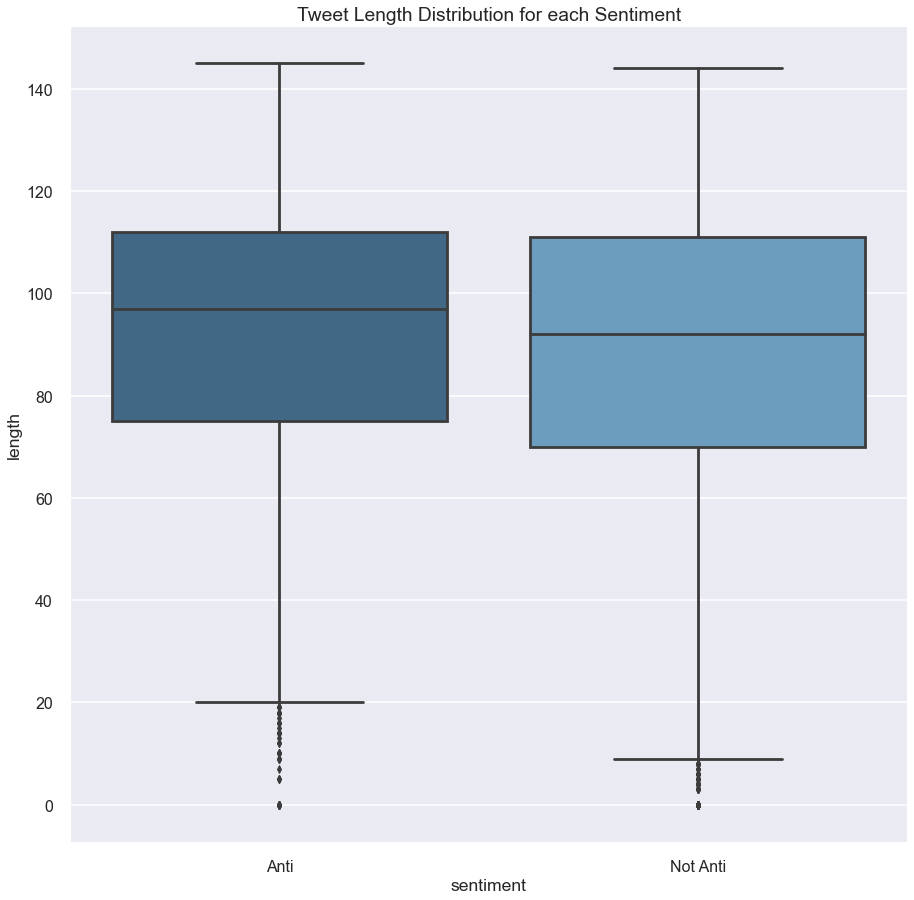

In [22]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=eda, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
frequency = {}

by_sentiment = eda.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


Anti         Not Anti       
         word  freq       word   freq
0     climate  2381    climate  32682
1      change  2297     change  32215
2      global  1953     global   8933
3     warming  1476    warming   6719
4        warm   437      trump   4923
5        make   349        say   2606
6         say   226    believe   2541
7         man   221      think   2032
8       cause   219       warm   1732
9        just   207      world   1727
10       year   202       real   1691
11      obama   194      fight   1681
12    science   193      doesn   1587
13  scientist   188        new   1465
14       hoax   182       make   1464
15      trump   176     people   1445
16    believe   175       just   1377
17       real   168  scientist   1319
18     people   167      cause   1248
19    liberal   161        don   1241
20    weather   145       like   1176
21       fake   142        epa   1101
22       like   137  president   1081
23      think   133       need   1057
24       scam   133    science    969

100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


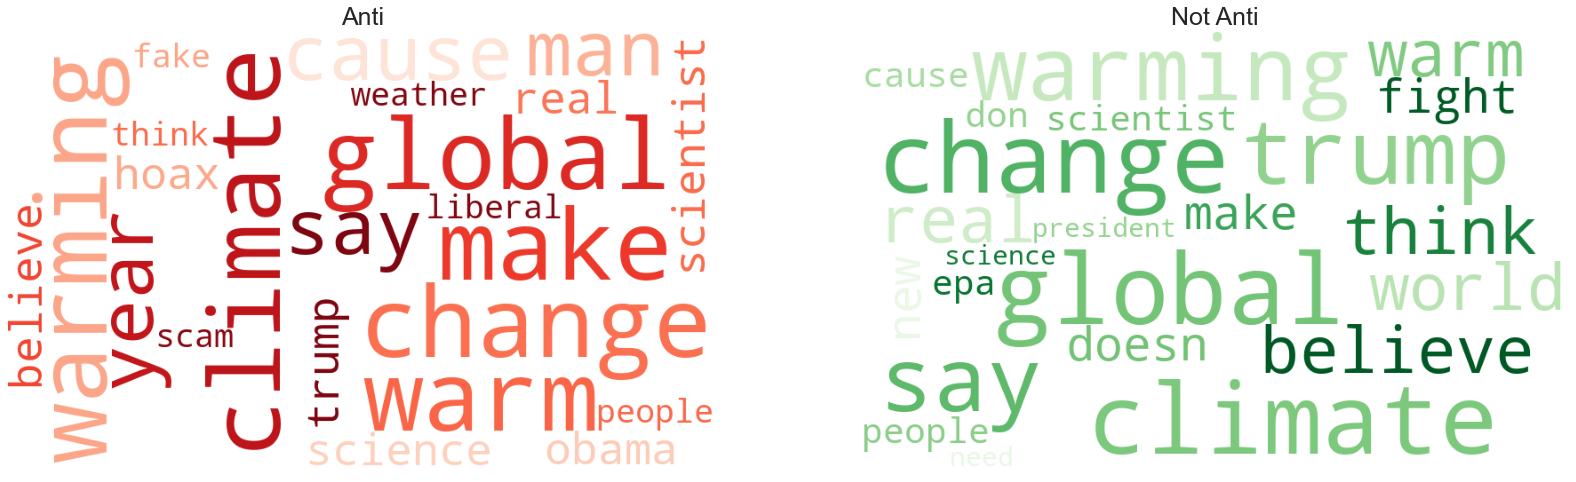

In [25]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Anti": ("Reds", 110),
    "Not Anti" : ("Greens", 73)
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(1, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter % 2].imshow(wordcloud)
    axes[counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

In [26]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [27]:
data_df["message"] = data_df["message"].apply(cleaner)
X_all = data_df["message"]
y_all = data_df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.10, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.111, random_state=1337)

In [28]:
import wandb
wandb.login()

# Name your wandb project
WANDB_PROJECT = 'aiforgood_twitter'
# Start a wandb run and add any additional info you'd like to the config  
run = wandb.init(project='aiforgood_twitter', 
                 config={'wandb_nb':'twitter'},
                 name='twitter_data',
                 notes='EDA of Twitter data'
                ) 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ishgirwan (use `wandb login --relogin` to force relogin)


In [29]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<35158x24721 sparse matrix of type '<class 'numpy.float64'>'
	with 487907 stored elements in Compressed Sparse Row format>

In [30]:
def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))
    probs = model.predict_proba(tfidf.transform(test_data))
    return preds, probs


In [31]:
def train_and_grade(model_name, tfidf, model, train_data, train_labels, test_data, test_labels):
    preds, probs = train(tfidf, model, train_data, train_labels, test_data)
    test_labels = test_labels.to_numpy()
    grade(model_name, model, preds, probs, test_labels)

In [32]:
def grade(model_name, model, preds, probs, test_labels):
    
    classification_report = wandb.sklearn.metrics.classification_report(test_labels, preds)
    print(classification_report)
    wandb.log({model_name + "_"+'classification_report': classification_report})
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)


    wandb.log({model_name + "_"+"pr_curve" : wandb.plot.pr_curve(
                                                        y_true=test_labels, 
                                                        y_probas=probs,
                                                        labels=model.classes_)})
    wandb.log({model_name + "_"+"roc" : wandb.plot.roc_curve(
                                                        y_true=test_labels, 
                                                        y_probas=probs,
                                                        labels=model.classes_)})

    # Confusion Matrix
    wandb.sklearn.plot_confusion_matrix(y_true=test_labels, 
                                        y_pred=preds, 
                                        labels=model.classes_,
                                        title=model_name + "_"+"Confusion matrix",
                                        normalize=True)
    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
    sns.heatmap(cm_normd, **heatmap_kwargs)
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3965
           1       0.43      0.72      0.54       425

    accuracy                           0.88      4390
   macro avg       0.70      0.81      0.73      4390
weighted avg       0.92      0.88      0.89      4390



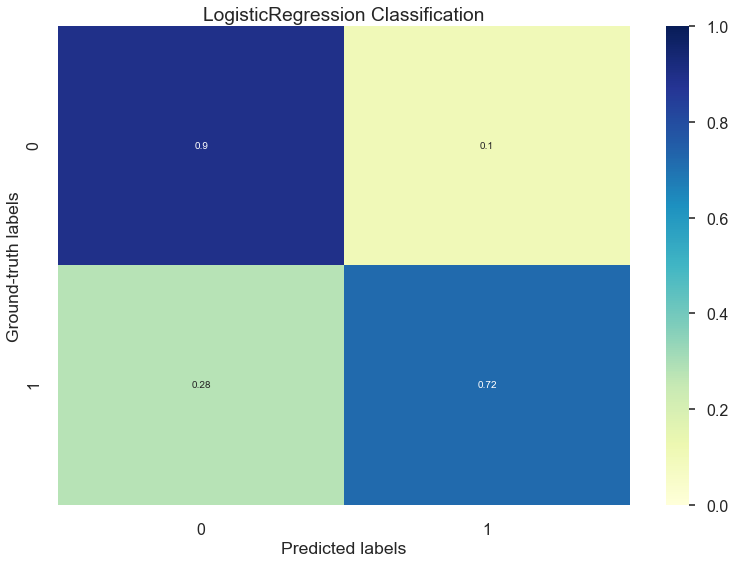

In [33]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
train_and_grade('Logistic_Regression', tfidf, logreg, X_train, y_train, X_valid, y_valid)

In [34]:
run.finish()

Logistic_Regression_classification_report,precis...
_runtime,33
_timestamp,1621328788
_step,3


_runtime,▁▁▆█
_timestamp,▁▁▆█
_step,▁▃▆█
